# FCFS-Scheduling

> FCFS (First-Come-First-Served) is a scheduling strategy in which operations are processed strictly in the order of their earliest possible start—based on the arrival time of the job and machine availability.


In [1]:
import sys
import os

# project directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Add to sys.path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import json

# utils
import src.utils.converter as convert
import src.utils.visualization.gantt_diagram as gantt
from src.utils.initialization import jobs_jssp_init as init
from src.utils.analysis_basics import check_constraints as check

# data access
from configs.path_manager import get_path

# solver
from src.solvers.converter import get_job_ops_dict
from src.solvers.converter import get_schedule_dframe
from src.solvers.heuristics.first_come_first_serve import solve as solve_fcfs


In [3]:
# Datei laden
basic_data_path = get_path("data", "basic")
file_path = basic_data_path / "jobshop_instances.json"

with open(file_path, "r", encoding="utf-8") as f:
    jobshop_instances = json.load(f)

instance =  jobshop_instances["instance ft10"]
df_routings = convert.routing_dict_to_df(instance)
df_routings

,Routing_ID,Operation,Machine,Processing Time
0,0,0,M00,29
1,0,1,M01,78
2,0,2,M02,9
3,0,3,M03,36
4,0,4,M04,49
...,...,...,...,...
95,9,5,M09,76
96,9,6,M05,47
97,9,7,M03,52
98,9,8,M04,90


In [4]:
df_jssp = init.generate_jssp_from_routings(df_routings, shuffle = False)
df_jssp

,Job,Routing_ID,Operation,Machine,Processing Time
0,J25-0000,0,0,M00,29
1,J25-0000,0,1,M01,78
2,J25-0000,0,2,M02,9
3,J25-0000,0,3,M03,36
4,J25-0000,0,4,M04,49
...,...,...,...,...,...
95,J25-0009,9,5,M09,76
96,J25-0009,9,6,M05,47
97,J25-0009,9,7,M03,52
98,J25-0009,9,8,M04,90


**FCFS-Scheduling Algorithmus**

1. **Initialisierung**:

   * Setze Startzeit jedes Produktionsauftrags (`job_ready`) und Maschinenverfügbarkeit (`machine_ready`) auf 0.
   * Setze die nächste einzuplanende Operation jedes Jobs auf `Operation 0`.

2. **Solange noch nicht alle Operationen eingeplant sind**:

   1. Durchlaufe alle Jobs:

      * Ermittle für jede noch nicht geplante Operation die **frühestmögliche Startzeit**, basierend auf:

        * dem frühesten Abschluss der vorherigen Operation des Jobs,
        * der Verfügbarkeit der zugehörigen Maschine.
   2. Wähle unter allen betrachtbaren Jobs die **Operation mit dem kleinsten frühestmöglichen Startzeitpunkt**.

      * Bei Gleichstand: wähle den Job mit der kleineren ID.
   3. **Plane diese Operation ein**:

      * Weise ihr Start- und Endzeit zu.
      * Aktualisiere Maschinenverfügbarkeit und Jobstatus.
      * Erhöhe den Index der nächsten Operation für diesen Job.

3. **Wiederholen**, bis alle Operationen eingeplant sind.



> Dieser FCFS-Algorithmus löst Maschinenkonflikte **implizit** durch Reihenfolge im Schleifendurchlauf


In [5]:
job_ops = get_job_ops_dict(df_jssp)
job_ops

{'J25-0000': [(0, 'M00', 29),
  (1, 'M01', 78),
  (2, 'M02', 9),
  (3, 'M03', 36),
  (4, 'M04', 49),
  (5, 'M05', 11),
  (6, 'M06', 62),
  (7, 'M07', 56),
  (8, 'M08', 44),
  (9, 'M09', 21)],
 'J25-0001': [(0, 'M00', 43),
  (1, 'M02', 90),
  (2, 'M04', 75),
  (3, 'M09', 11),
  (4, 'M03', 69),
  (5, 'M01', 28),
  (6, 'M06', 46),
  (7, 'M05', 46),
  (8, 'M07', 72),
  (9, 'M08', 30)],
 'J25-0002': [(0, 'M01', 91),
  (1, 'M00', 85),
  (2, 'M03', 39),
  (3, 'M02', 74),
  (4, 'M08', 90),
  (5, 'M05', 10),
  (6, 'M07', 12),
  (7, 'M06', 89),
  (8, 'M09', 45),
  (9, 'M04', 33)],
 'J25-0003': [(0, 'M01', 81),
  (1, 'M02', 95),
  (2, 'M00', 71),
  (3, 'M04', 99),
  (4, 'M06', 9),
  (5, 'M08', 52),
  (6, 'M07', 85),
  (7, 'M03', 98),
  (8, 'M09', 22),
  (9, 'M05', 43)],
 'J25-0004': [(0, 'M02', 14),
  (1, 'M00', 6),
  (2, 'M01', 22),
  (3, 'M05', 61),
  (4, 'M03', 26),
  (5, 'M04', 69),
  (6, 'M08', 21),
  (7, 'M07', 49),
  (8, 'M09', 72),
  (9, 'M06', 53)],
 'J25-0005': [(0, 'M02', 84),
  (1, 'M

In [6]:
schedule = solve_fcfs(job_ops)
schedule



Planungsinformationen (FCFS):
  Anzahl Operationen  : 100
  Makespan            : 1262
  Laufzeit            : ~0.0002 Sekunden


[('J25-0000', 0, 'M00', 0, 29, 29),
 ('J25-0002', 0, 'M01', 0, 91, 91),
 ('J25-0004', 0, 'M02', 0, 14, 14),
 ('J25-0005', 0, 'M02', 14, 84, 98),
 ('J25-0001', 0, 'M00', 29, 43, 72),
 ('J25-0004', 1, 'M00', 72, 6, 78),
 ('J25-0008', 0, 'M00', 78, 76, 154),
 ('J25-0000', 1, 'M01', 91, 78, 169),
 ('J25-0001', 1, 'M02', 98, 90, 188),
 ('J25-0002', 1, 'M00', 154, 85, 239),
 ('J25-0003', 0, 'M01', 169, 81, 250),
 ('J25-0000', 2, 'M02', 188, 9, 197),
 ('J25-0001', 2, 'M04', 188, 75, 263),
 ('J25-0000', 3, 'M03', 197, 36, 233),
 ('J25-0007', 0, 'M02', 197, 31, 228),
 ('J25-0002', 2, 'M03', 239, 39, 278),
 ('J25-0007', 1, 'M00', 239, 86, 325),
 ('J25-0003', 1, 'M02', 250, 95, 345),
 ('J25-0004', 2, 'M01', 250, 22, 272),
 ('J25-0000', 4, 'M04', 263, 49, 312),
 ('J25-0001', 3, 'M09', 263, 11, 274),
 ('J25-0004', 3, 'M05', 272, 61, 333),
 ('J25-0005', 1, 'M01', 272, 2, 274),
 ('J25-0006', 0, 'M01', 274, 46, 320),
 ('J25-0001', 4, 'M03', 278, 69, 347),
 ('J25-0008', 1, 'M01', 320, 69, 389),
 ('J25-

In [7]:
df_schedule = get_schedule_dframe(schedule)
df_schedule

,Job,Operation,Machine,Start,Processing Time,End
0,J25-0000,0,M00,0,29,29
1,J25-0000,1,M01,91,78,169
2,J25-0000,2,M02,188,9,197
3,J25-0000,3,M03,197,36,233
4,J25-0000,4,M04,263,49,312
...,...,...,...,...,...,...
95,J25-0009,5,M09,952,76,1028
96,J25-0009,6,M05,1028,47,1075
97,J25-0009,7,M03,1075,52,1127
98,J25-0009,8,M04,1127,90,1217


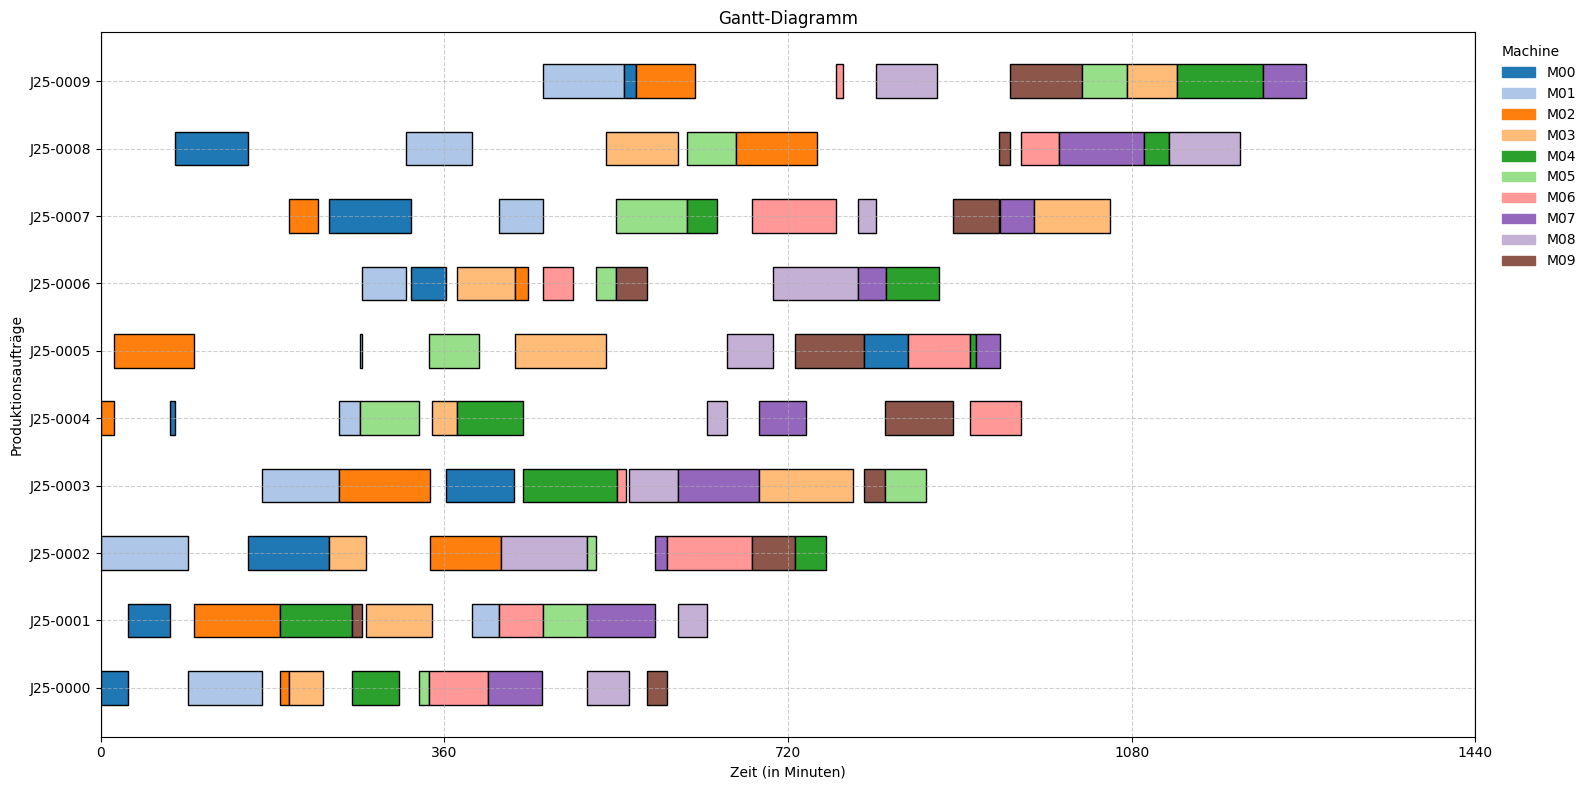

In [8]:
gantt.get_plot(df_schedule, perspective="Job")

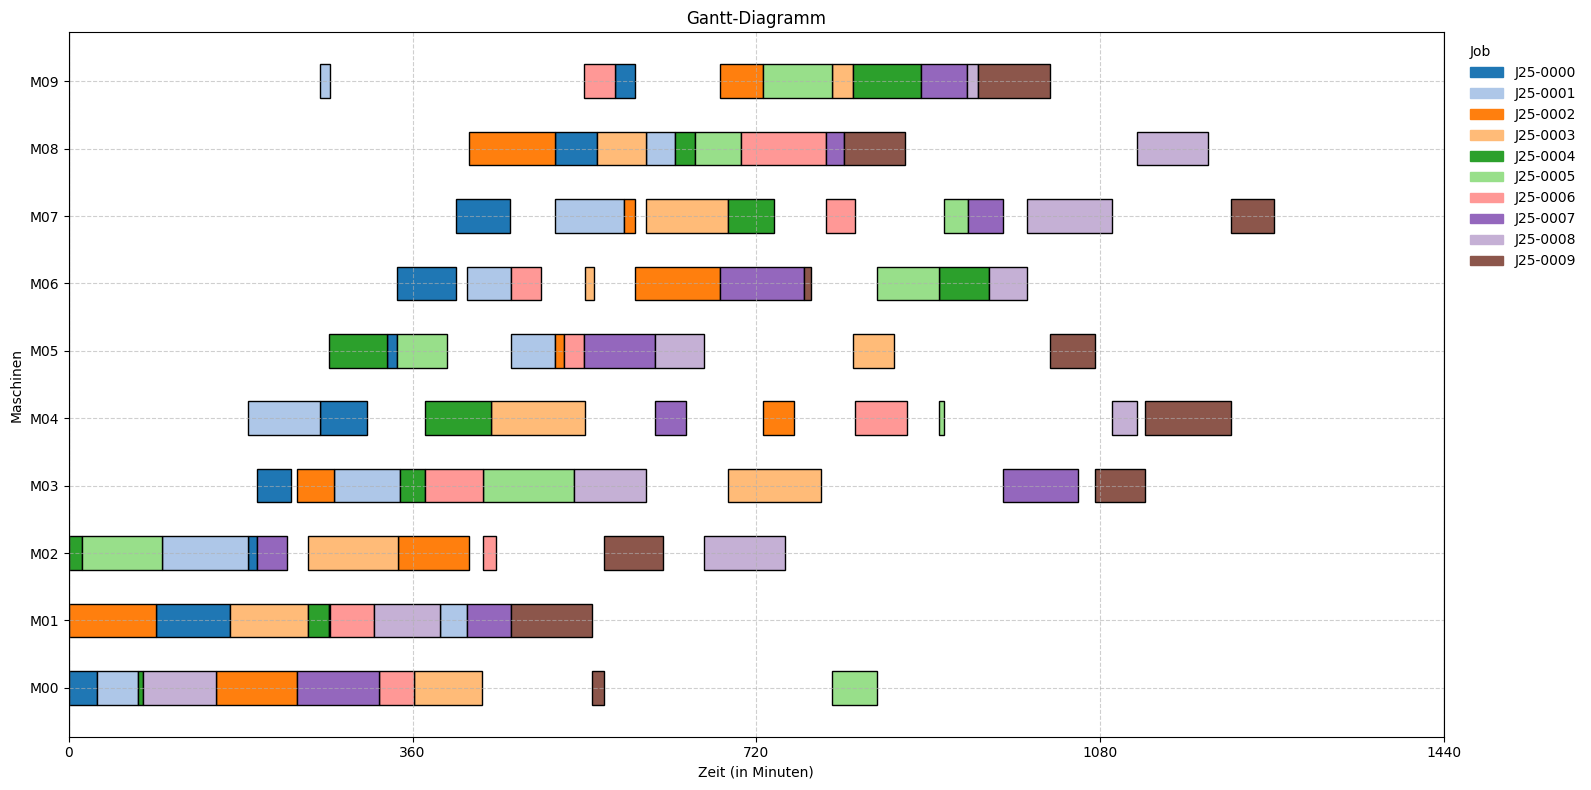

+ No machine conflicts found.
+ All job operations are scheduled in non-overlapping, correct sequence.


True

In [9]:
gantt.get_plot(df_schedule, perspective="Machine")
check.check_core_schedule_constraints(df_schedule)